# Problem Statement 

The year is 2011 and I am an analyst at House Flippers, Inc. 

House Flippers, Inc, is a Chicago-based firm that purchases houses in the Mid-West, renovates them, and sells them at a profit. House Flippers, Inc is expanding the regional scope of their business and has chosen Ames, IA as their next city to flip houses.    

My job is to create a predictive model that will estimate how much a house in Ames, IA will sell for based on various attributes, so House Flippers, Inc can have a better idea of how to focus their renovations and estimate their potential profit. 


# Background

As of the census of 2010, there were 58,965 people, 22,759 households.

Ames is home to the University of Iowa, which attracts many younger residents and is largest employer in the city by far. 

The dataset spans 2006 – 2010, therefore including home sales leading up to, and sometime after the Great Recession of 2008.

# Metadata

Data is sourced from the Ames Assessors Office and was originally compiled as part of a project for an undergraduate regression course. 
The dataset used to train the model contains 2051 individual home sales. 
This represents roughly 9% of the total households in the city of Ames during the time. 
The dataset contains 81 variables. 



# Data Dictionary

Original dataset documentation and data dicitonary found [here.](https://http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) 

# Import Data and Libraries

Essential libraries are imported into the notebook and our csv data file is converted into a pandas dataframe. Then we display the first fives rows the data and use the .info() method to show the inverse null count and data types of the columns in our dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utilities.graphing_utils as utl

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./../data/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

# Data Cleaning

Here the columns are renamed for programming convienience, null and outlying values are imputed with appropriate alternatives, and data types are converted. 

### Rename Columns

In [5]:
def space_dec(a):
    new_a = []
    for i in a:
        if i == a[0]:
            new_a.append(i.lower())
        elif i == " ":
            new_a.append("_")
        elif i in i.upper():
            new_a.append(i.lower())
        else: 
            new_a.append(i)
    new_a = "".join(new_a)
    return new_a

listy = [space_dec(i) for i in df.columns]
cols = [i for i in list(df.columns)]
dicti = list(zip(cols,listy))
dict1 = {k:v for (k,v) in dicti}

df.rename(columns=dict1, inplace = True)

## Diagnostic Check 

### Unique Values Count

Here I check the the count of unique values in each column, to understand which ones have more variability. 

In [6]:
def unq_cnt(df):
    new_list = []
    for i in df.columns:
        new_list.append(i)
        def un_cnt(col):
            cnt = (len(df[col].unique()))
            return cnt
    col_counts = [un_cnt(i) for i in df.columns] 
    return list(zip(new_list,col_counts))

unq_cnt(df)

### Checking for nulls

In [7]:
def null_sort():
    return df.apply(pd.isnull).sum().sort_values(ascending=False).loc[lambda series: series>0]

In [8]:
null_sort()

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
dtype: int64

### Categorical Null Imputation

In [9]:
nominal_na = ['alley', 
'bsmt_qual', 
'bsmt_cond', 
'bsmt_exposure', 
'bsmtfin_type_2',
'bsmtfin_type_1', 
'fence', 
'fireplace_qu',
'garage_type',
'garage_finish',
'garage_cond',
'garage_qual',
'mas_vnr_type',
'misc_feature',
'pool_qc']

In [10]:
def nom_na_convert(a):
    df.loc[:,a] = df.loc[:,a].fillna('No')
    return a

In [11]:
[nom_na_convert(i) for i in nominal_na]

['alley',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_2',
 'bsmtfin_type_1',
 'fence',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_cond',
 'garage_qual',
 'mas_vnr_type',
 'misc_feature',
 'pool_qc']

### Numerical Null Imputation

Assuming that a null value represnted the lack of a feature, I created a list of continous columns, and used a function to convert any null values to 0.

In [12]:
cont_na = ['lot_frontage',
'mas_vnr_area',
'bsmt_full_bath',
'bsmt_half_bath',
'bsmtfin_sf_1',
'garage_cars',
'garage_area',
'garage_yr_blt',
'bsmtfin_sf_2',
'total_bsmt_sf',
'2nd_flr_sf',           
'bsmt_unf_sf'] 

In [13]:
def cont_na_convert(a):
    df.loc[:,a] = df.loc[:,a].fillna(0)
    return a 

In [14]:
[cont_na_convert(i) for i in cont_na]

['lot_frontage',
 'mas_vnr_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'bsmtfin_sf_1',
 'garage_cars',
 'garage_area',
 'garage_yr_blt',
 'bsmtfin_sf_2',
 'total_bsmt_sf',
 '2nd_flr_sf',
 'bsmt_unf_sf']

In [15]:
null_sort()

Series([], dtype: int64)

### Datatype Conversions

MS_Subclass is stored as a intger currently, but really is a categorical variable so it will be converted to string type variable to be dummified later.

In [16]:
df['ms_subclass'] = df['ms_subclass'].astype(str) 

### Dealing with Outliers

The mean was imputed where the living area exceeded 4000 square feet. 

In [17]:
df['gr_liv_area'].where(df['gr_liv_area'] < 4000, df['gr_liv_area'].mean(), inplace=True)

Similary, the median was imputed where the number of bedrooms above ground was 0, or more than 7. 

In [18]:
df.loc[df['bedroom_abvgr'] > 7, 'bedroom_abvgr'] = df['bedroom_abvgr'].median()
df.loc[df['bedroom_abvgr'] < 1, 'bedroom_abvgr'] = df['bedroom_abvgr'].median()

### Export Cleaned Dataframe

In [19]:
df.to_csv('../data/cleaned_df.csv')

# EDA

In [20]:
df['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

Based on the summary statistics of the sale price, we can see the large range of home prices from ~\$13000 to ~\$610,000. Furthermore, we can already infer that prices are postively skewed as the mean value is larger than the median.

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


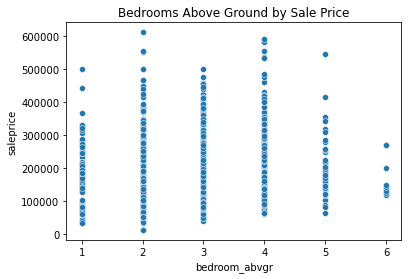

In [21]:
ax = sns.scatterplot(df['bedroom_abvgr'], df['saleprice'])
ax.set_title('Bedrooms Above Ground by Sale Price');

Contrary to what's expected it seems the number of bedrooms above ground and sale price have a muted relationship. Sale price appears to actually go down with price. This may because larger homes are used to accomadate students (ie fraternity houses) which may have an inverse relationship with overall quality or general desirability. 

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


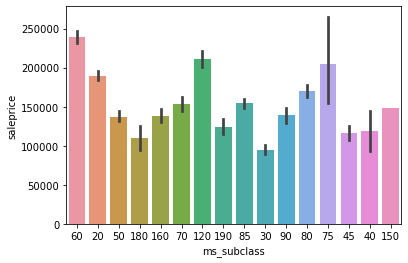

In [22]:
sns.barplot(df['ms_subclass'], df['saleprice'])
ax.set_title('Sub Class by Sale Price');

Two story buildings built after 1946 had the highest average sale prices, while one story homes built before 1946 had the lowest,

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


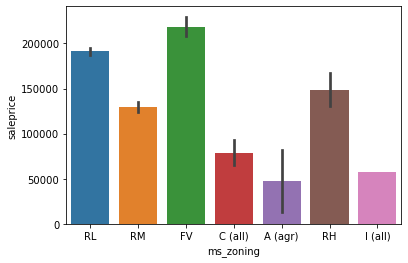

In [23]:
sns.barplot(df['ms_zoning'], df['saleprice'])
ax.set_title('Zone by Sale Price');

The Floating Village Residential zone had the highest average sale price, but is a retirement community and does not make up a large portion of the housing stock.

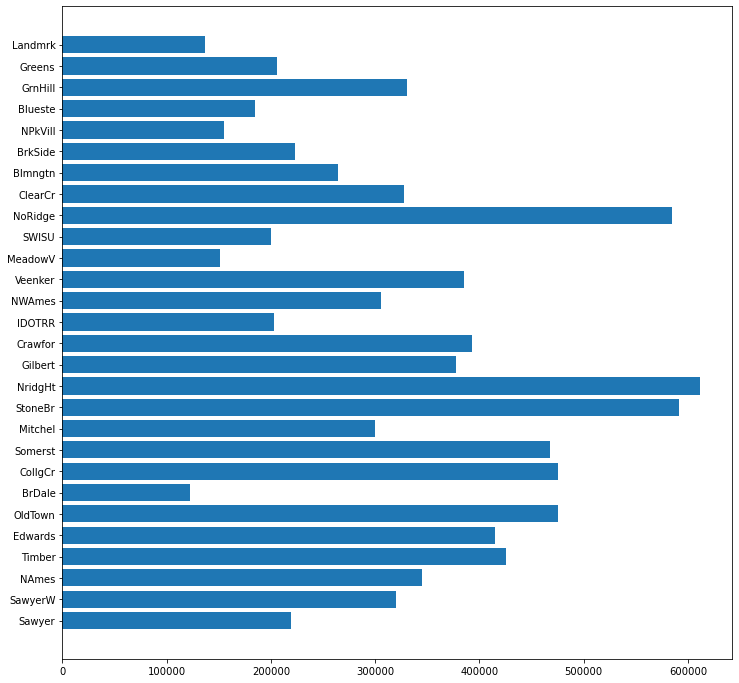

In [24]:
plt.figure(figsize=(12,12))
plt.barh(df['neighborhood'], df['saleprice'])
ax.set_title('Neighborhood by Sale Price');

Northridge, Northridge Heights and Stonebrook enjoy the highest average home sales, while Old Town, Northwest Ames, and the Iowa Department of Transportation and Railroad are the lowest.  

In [25]:
df.groupby(df['yr_sold'])['saleprice'].mean()

yr_sold
2006    179471.609589
2007    185524.514056
2008    181750.372414
2009    182455.244395
2010    174180.059829
Name: saleprice, dtype: float64

Surprisingly enough, the drop in average annual sale price was not as signficat during and after 2008 as one might have expected, indicating that Ames housing is recession-proof, most likely due to the presence of the university, which provides a steady flow of residents despite economic down-turn. 

In [26]:
df.groupby(df['mo_sold'])['saleprice'].mean()

mo_sold
1     195126.303797
2     177626.519231
3     174625.779762
4     163901.269231
5     180332.369650
6     182662.798295
7     188571.514851
8     186927.359281
9     188990.761468
10    179334.471545
11    184377.495146
12    182459.615385
Name: saleprice, dtype: float64

Sale price varies widely on a monthly scale – homes sold in January sell for more than \$30000 than a home in April, on average.

In [27]:
df['mo_sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: mo_sold, dtype: int64

More than four times the amount of homes are sold in the summer than in the winter on average, annually.

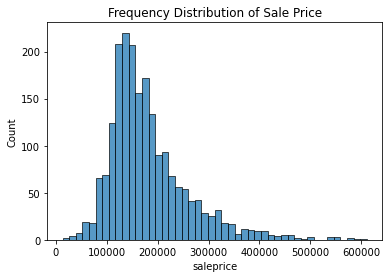

In [28]:
ax = sns.histplot(df['saleprice'])
ax.set_title('Frequency Distribution of Sale Price');

Sales prices are positively skewed. Because they are not normally distibuted, this may affect its predictive power when being used for modeling. 

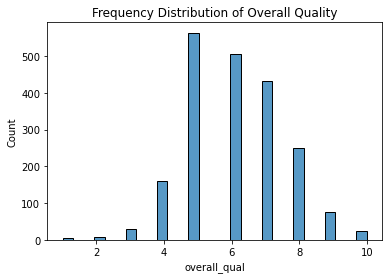

In [29]:
ax = sns.histplot(df['overall_qual'])
ax.set_title('Frequency Distribution of Overall Quality');

Overall quality, which sale price is most closely correlated, is negatively skewed.

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


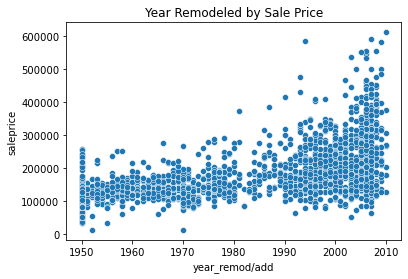

In [30]:
ax = sns.scatterplot(df['year_remod/add'], df['saleprice'])
ax.set_title('Year Remodeled by Sale Price');

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


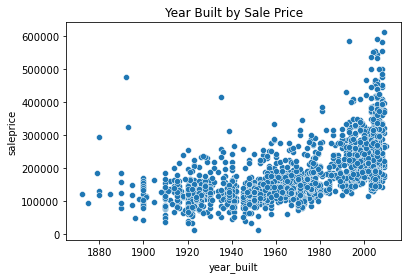

In [31]:
ax = sns.scatterplot(df['year_built'], df['saleprice'])
ax.set_title('Year Built by Sale Price');

The recency of a home's building or remodeling has a linear, but also diluted relationship to sale price. 

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


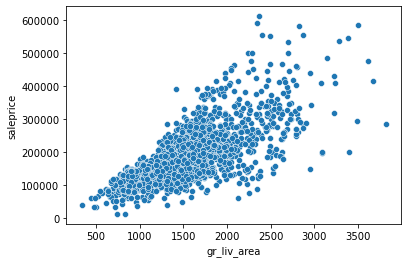

In [32]:
sns.scatterplot(df['gr_liv_area'], df['saleprice']);

The greater living area column has a high correlation with sale price and exhibits a clearly linear, but varibale realtionship.

# Preprocessing

## Create Dummy Columns

I divide categorical columns and numerical columns based on object type, and dummify the categorical columns into modelable features using OHE.  

In [33]:
cat_features = df.select_dtypes(include = ["object"]).columns
num_features = df.select_dtypes(exclude = ['object']).columns

In [34]:
num_features = df[num_features]
dum_cat_features = df[cat_features]

In [35]:
dum_cat_features = pd.get_dummies(dum_cat_features, drop_first=True)

In [36]:
df = pd.concat([dum_cat_features, num_features], axis = 1)

In [37]:
df.head()

,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_No,alley_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_No,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_No,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_No,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_No,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_No,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,fireplace_qu_Fa,fireplace_qu_Gd,fireplace_qu_No,fireplace_qu_Po,fireplace_qu_TA,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_No,garage_finish_No,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_No,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_No,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,pool_qc_Fa,pool_qc_Gd,pool_qc_No,pool_qc_TA,fence_GdWo,fence_MnPrv,fence_MnWw,fence_No,misc_feature_Gar2,misc_feature_No,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_typ

## Correlation 

Below are three lists which display correlations between sale price, as the target variable, and every other variable in our new dataframe. The first are the most correlated in absoulte value, next are the most positively correlated variables, and last are the most negaitvely correlated. All are sorted in descending order. The truncated lists are shown for clarity but were explored in depth. 

### Absolute Value Correlation with Price

In [38]:
df.corr()[['saleprice']].sort_values(by='saleprice', ascending=False, key=np.abs).head(60)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.719449
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
exter_qual_TA,-0.600362
year_built,0.571849
year_remod/add,0.550370


### Positive Correlation with Price

In [39]:
df.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).head(60)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.719449
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969


### Negative Correlation with Price

In [40]:
df.corr()[['saleprice']].sort_values(by='saleprice', ascending=True).head(60)

,saleprice
exter_qual_TA,-0.600362
kitchen_qual_TA,-0.540860
fireplace_qu_No,-0.485858
bsmt_qual_TA,-0.456979
garage_finish_Unf,-0.432220
mas_vnr_type_None,-0.424088
garage_type_Detchd,-0.370344
foundation_CBlock,-0.355535
bsmt_exposure_No,-0.352888
heating_qc_TA,-0.343542


## Selecting Features

In [41]:
features = df.loc[:, ['overall_qual',
'gr_liv_area',
'garage_area',
'total_bsmt_sf',
'1st_flr_sf',
'exter_qual_TA',
'year_built',
'year_remod/add',
'kitchen_qual_TA',
'full_bath',
'foundation_PConc',
'garage_yr_blt',
'totrms_abvgrd',
'mas_vnr_area',
'fireplace_qu_No',
'fireplaces',
'bsmtfin_type_1_GLQ',
'bsmt_qual_TA',
'neighborhood_NridgHt',
'exter_qual_Gd',
'garage_finish_Unf',
'mas_vnr_type_None',
'bsmtfin_sf_1',
'fireplace_qu_Gd',
'bsmt_exposure_Gd',
'garage_type_Detchd',
'sale_type_New',
'foundation_CBlock',
'ms_subclass_60',
'bsmt_exposure_No',
'heating_qc_TA',
'exterior_1st_VinylSd',
'open_porch_sf',
'wood_deck_sf',
'mas_vnr_type_Stone',
'lot_shape_Reg',
'kitchen_qual_Gd',
'lot_area',
'paved_drive_Y',
'bsmt_full_bath',
'half_bath',
'ms_zoning_RM',
'central_air_Y',
'garage_cond_TA',
'roof_style_Hip',
'neighborhood_NoRidge',
'mas_vnr_type_BrkFace',
'neighborhood_StoneBr',
'electrical_SBrkr',
'garage_qual_TA',
'roof_style_Gable',
'ms_subclass_30',
'2nd_flr_sf',
'ms_zoning_RL',
'garage_type_No']]

In [42]:
df_target = df['saleprice']

In [43]:
df_features = features

In [44]:
df_model = pd.concat([df_target, df_features], axis = 1)

In [45]:
df_model.head()

,saleprice,overall_qual,gr_liv_area,garage_area,total_bsmt_sf,1st_flr_sf,exter_qual_TA,year_built,year_remod/add,kitchen_qual_TA,full_bath,foundation_PConc,garage_yr_blt,totrms_abvgrd,mas_vnr_area,fireplace_qu_No,fireplaces,bsmtfin_type_1_GLQ,bsmt_qual_TA,neighborhood_NridgHt,exter_qual_Gd,garage_finish_Unf,mas_vnr_type_None,bsmtfin_sf_1,fireplace_qu_Gd,bsmt_exposure_Gd,garage_type_Detchd,sale_type_New,foundation_CBlock,ms_subclass_60,bsmt_exposure_No,heating_qc_TA,exterior_1st_VinylSd,open_porch_sf,wood_deck_sf,mas_vnr_type_Stone,lot_shape_Reg,kitchen_qual_Gd,lot_area,paved_drive_Y,bsmt_full_bath,half_bath,ms_zoning_RM,central_air_Y,garage_cond_TA,roof_style_Hip,neighborhood_NoRidge,mas_vnr_type_BrkFace,neighborhood_StoneBr,electrical_SBrkr,garage_qual_TA,roof_style_Gable,ms_subclass_30,2nd_flr_sf,ms_zoning_RL,garage_type_No
0,130500,6,1479.0,475.0,725.0,725,0,1976,2005,0,2,0,1976.0,6,289.0,1,0,1,1,0,1,0,0,533.0,0,0,0,0,1,1,1,0,0,44,0,0,0,1,13517,1,0.0,1,0,1,1,0,0,1,0,1,1,1,0,754,1,0
1,220000,7,2122.0,559.0,913.0,913,0,1996,1997,0,2,1,1997.0,8,132.0,0,1,1,0,0,1,0,0,637.0,0,0,0,0,0,1,1,0,1,74,0,0,0,1,11492,1,1.0,1,0,1,1,0,0,1,0,1,1,1,0,1209,1,0
2,109000,5,1057.0,246.0,1057.0,1057,1,1953,2007,0,1,0,1953.0,5,0.0,1,0,1,1,0,0,1,1,731.0,0,0,1,0,1,0,1,1,1,52,0,0,1,1,7922,1,1.0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0
3,174000,5,1444.0,400.0,384.0,744,1,2006,2007,1,2,1,2007.0,7,0.0,1,0,0,0,0,0,0,1,0.0,0,0,0,0,0,1,1,0,1,0,100,0,1,0,9802,1,0.0,1,0,1,1,0,0,0,0,1,1,1,0,700,1,0
4,138500,6,1445.0,484.0,676.0,831,1,1900,1993,1,2,1,1957.0,6,0.0,1,0,0,0,0,0,1,1,0.0,0,0,1,0,0,0,1,1,0,59,0,0,0,0,14235,0,0.0,0,0,1,1,0,0,0,0,1,1,1,0,614,1,0


In [46]:
df_model.shape

(2051, 56)

In [47]:
df_model.to_csv('../data/model_df.csv')

# Modeling

## Intial Benchmarks

Admittedly, the work flow of the project has been more sporadic and cyclical than linear. 
There were two previous model iterations using different selections of features, which were not documented properly, and instead were simply replaced with the most recent. 

Our true baseline score comes from the inital OLS model, which used the 45 most correlated variables in terms of absolute value to the target, sale price. Multicollinearity was note accounted for and no features were removed. This model had a training score roughly 0.87, a test score of 0.82, with an RMSE of approximately \$32,000 – discernibly overfit and not very accurate. 

The next model took a similar approach, but with an attempt to mitigate high variance. Using the same intitial list of correlation by absolute value, 30 features were picked, and further shaved down to remove obviously collinear variables such as garage area and garage car capacity, amongst others. This model had a training score of 0.77, test score of 0.73, with an RMSE of approximately \$41,000 just about as overfit as the intial model and even less accurate. 

## Create our feature matrix (X) and target vector (y)

In [48]:
X = features
y = df['saleprice']

## Train/test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

After declaring the features and target for the model, the data is split into training and testing sets. The model is instantiated and then cross validated before fitting occurs. 

## Linear Regression Instantiation 

In [50]:
lr = LinearRegression()

### Cross validation

In [51]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=35)

In [52]:
print(lr_scores)
lr_scores.mean()

[0.86183557 0.85975324 0.9213193  0.86341175 0.86163143 0.72186221
 0.17741945 0.88055662 0.91013407 0.77568306 0.87839248 0.93128663
 0.90563586 0.83502687 0.85734985 0.89189987 0.8820535  0.96148648
 0.88245909 0.86693677 0.8852834  0.91707581 0.88195143 0.93560458
 0.93077553 0.86319085 0.93463144 0.91692376 0.90210042 0.8234748
 0.90827486 0.83800129 0.92260701 0.87288431 0.84479145]


0.8601058577732342

## Model Implementation 

### Fitting the model

In [53]:
lr.fit(X_train, y_train)

LinearRegression()

# Model Scores

In [54]:
lr.score(X_train, y_train)

0.9006394062535229

In [55]:
lr.score(X_test, y_test)

0.8902195178362824

### Coefficients & Intercept

In [56]:
#lr.coef_

In [57]:
lr.intercept_

-897127.6793894622

In [58]:
list(zip(lr.coef_, features.columns))

[(11716.117133361484, 'overall_qual'),
 (120.52707750685792, 'gr_liv_area'),
 (31.670826184784715, 'garage_area'),
 (12.730385009542601, 'total_bsmt_sf'),
 (-67.98976292721764, '1st_flr_sf'),
 (-20978.868342081165, 'exter_qual_TA'),
 (199.60747023673525, 'year_built'),
 (267.35562250174956, 'year_remod/add'),
 (-18001.296002820683, 'kitchen_qual_TA'),
 (-3494.7230059999924, 'full_bath'),
 (1131.7802183799415, 'foundation_PConc'),
 (-7.669087448762184, 'garage_yr_blt'),
 (-1407.9219518086516, 'totrms_abvgrd'),
 (29.175856443780503, 'mas_vnr_area'),
 (3538.5589903850387, 'fireplace_qu_No'),
 (7811.274603465133, 'fireplaces'),
 (-435.944195882571, 'bsmtfin_type_1_GLQ'),
 (1980.3041007287827, 'bsmt_qual_TA'),
 (24932.693083479353, 'neighborhood_NridgHt'),
 (-21401.73081872603, 'exter_qual_Gd'),
 (-372.4194899475715, 'garage_finish_Unf'),
 (6852.552675659136, 'mas_vnr_type_None'),
 (19.485613244451088, 'bsmtfin_sf_1'),
 (3283.4351601608123, 'fireplace_qu_Gd'),
 (16020.596863897954, 'bsmt_ex

### Making predictions

In [59]:
lr_predictions = lr.predict(X)

### Residuals

In [60]:
lr_resids = y - lr_predictions

In [61]:
lr_resids.mean()

75.03271693568298

### Residuals plot

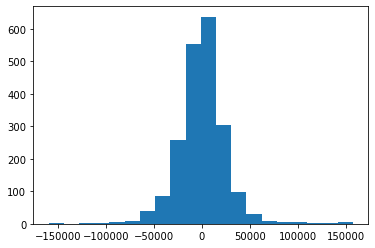

In [62]:
plt.hist(lr_resids, bins = 20);

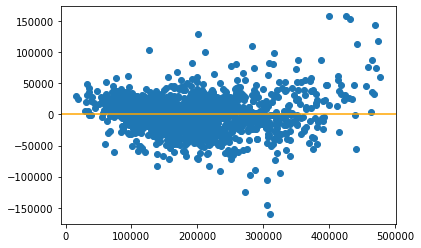

In [63]:
plt.scatter(lr_predictions, lr_resids)
plt.axhline(0, color = 'orange');

### Assumptions 

Based on the value of correlations to the target, we will assume there is a linear relationship to be explored. However, based on the collective influence of houses within a given proximity, assuming that samples behave independently may be a stretch in this instance. We will assume our residuals loosley follow a normal distribution based on the histogram above. However, our residuals do not exhibit homoskedasticity as the residuals are not random but follow a pattern of greater variability as the sale price increases.  

### Metrics

In [64]:
metrics.mean_squared_error(y, lr_predictions, squared=False)

25270.46073064286

The current model started the same as the previous iterations, but collected the 65 features most correlated to the target. Clearly collinear variables were removed by hand in this iteration as well. With high trainging, test scores and small difference between the two this model seemed to provide the most accuracy while simultaneously mitigating overfitting. Additionally, with an RMSE of \$25270 it has the RMSE so far. 

# Other models

Here I repeat the steps above of instantiating, fitting and scoring use Ridge CV, Lasso CV, and Elastic Net CV to see if these models may be able to produce results that are more accurate and less overfit. 

# Ridge CV Implementation

## Scaling Features

We start by scaling our data, and then create a list of alphas for the model to iterate through, before it chooses the optimal value. 

In [65]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [66]:
r_alphas = np.logspace(0, 5, 100)

## Instantiating Model

In [67]:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

## Fitting model

In [68]:
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [69]:
ridge_cv.alpha_

73.90722033525779

In [70]:
ridge_cv.score(Z_train, y_train)

0.8928725127381201

In [71]:
ridge_cv.score(Z_test, y_test)

0.8498994594648891

# Lasso CV Implementation

In [109]:
l_alphas = np.logspace(-3, 0, 100)

In [110]:
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

In [111]:
lasso_cv.fit(Z_train, y_train);

In [113]:
lasso_cv.alpha_

1.0

In [88]:
lasso_cv.score(Z_train, y_train)

0.900639289787048

In [89]:
lasso_cv.score(Z_test, y_test)

0.8901826950224797

# Elastic Net CV Implementation

Alphas are created once again, and the enet ratio is set which will balance differnt types parameter penalites, hypothetcially taking the best of both Ridge and Lasso. 

In [78]:
enet_alphas = np.linspace(0.5, 1.0, 100)

In [79]:
enet_ratio = 0.5

In [101]:
enet_model = ElasticNetCV(alphas=enet_alphas, max_iter=500000, l1_ratio=enet_ratio, cv=5)

In [102]:
enet_model = enet_model.fit(X_train, y_train);

In [103]:
net_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

In [104]:
enet_model.score(X_train, y_train)

0.8750775476997549

In [105]:
enet_model.score(X_test, y_test)

0.8717558285810447

Even after implementing the features through a variety of models, the original OLS model has the best trade off in terms of the highest score and second lowest difference between scores, and therefore will be used as the production model. Holding all else constant and based on the given variables in the OLS model, we can predict with approximately 90% accuracy how much a house would have sold for in Ames, IA from 2006-2010, within a roughly \$26000 range.

# Recommendations & Conclusions

## Building Reccomendations

The overall quality of the building was the most highyl ocrrealted with sale price, additonally, a surplus of living, garage, and basement space helped add value. Newer buildings, the presence of a poured concrete foundations and stone masonry were also price boosters. 

Steer clear of buiildings that have poor exteriors, low quality ktichens, and no fire places. Detached/unfinished garages, as well as cinder block foundation were also seen to hurt the average sale price of a home.  

## Location Reccomendations

Aim to buy houses in neighborhoods such as Northridge, Northridge Heights, and Stonebrook neighborhoods, while avoiding Old Town, Northwest Ames, and the Iowa Department of Transportation and Railroad. 

2 Story houses built post 1946 have the highest correlation with sale price, while single story homes built before the war seem to have the lowest. 

Low density residential zones have the largest range of prices, but 

## Model conclusion and future applications

Despite the relatively unstable model, key valuable features still revealed themselves.
The model could be applied to other cities in certain regards, but falls short when considering the particularity of some of the location features.
The prominence of certain features in our model may be diminished or pronounced in different cities given the unique nature of its college town status. (ie, bedroom count, location, recession-proof)
